In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
covid = pd.read_excel('covid.xlsx');
covid

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,19,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,2,28,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,3,40,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,4,62,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,5,23,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,26,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no
483,484,51,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no
484,485,32,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,486,30,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no


In [36]:
covid=covid.drop(['#'], axis=1);
covid=covid.drop(['age'], axis=1);


In [37]:
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,487,486,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487
unique,2,3,4,3,4,2,3,3,2,4,3,2,2,2,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,436,275,387,450,255,462,239,282,445,333,276,394,426,380,471,423,449,326,380,425,479


In [39]:
a=covid.Diarrhea.unique()
b=covid.Abdominal_pain.unique()
print(a)
print(b)

['yes' 'no' 'Yes' 'No']
['yes' 'no' 'es']


In [42]:
covid=covid.replace({'Yes':'yes', 'No':'no'})
covid=covid.replace({'es':'yes'})
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,487,486,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,436,283,410,450,267,462,249,282,445,341,280,394,426,380,471,423,449,326,380,425,479


In [48]:
np.where(pd.isnull(covid))

(array([396]), array([1]))

In [49]:
covid=covid.drop(covid.index[396])

In [ ]:
covid=covid.replace({'yes':1, 'no':0})


In [54]:
covid=covid.drop_duplicates(keep=False)
covid.shape

(205, 21)

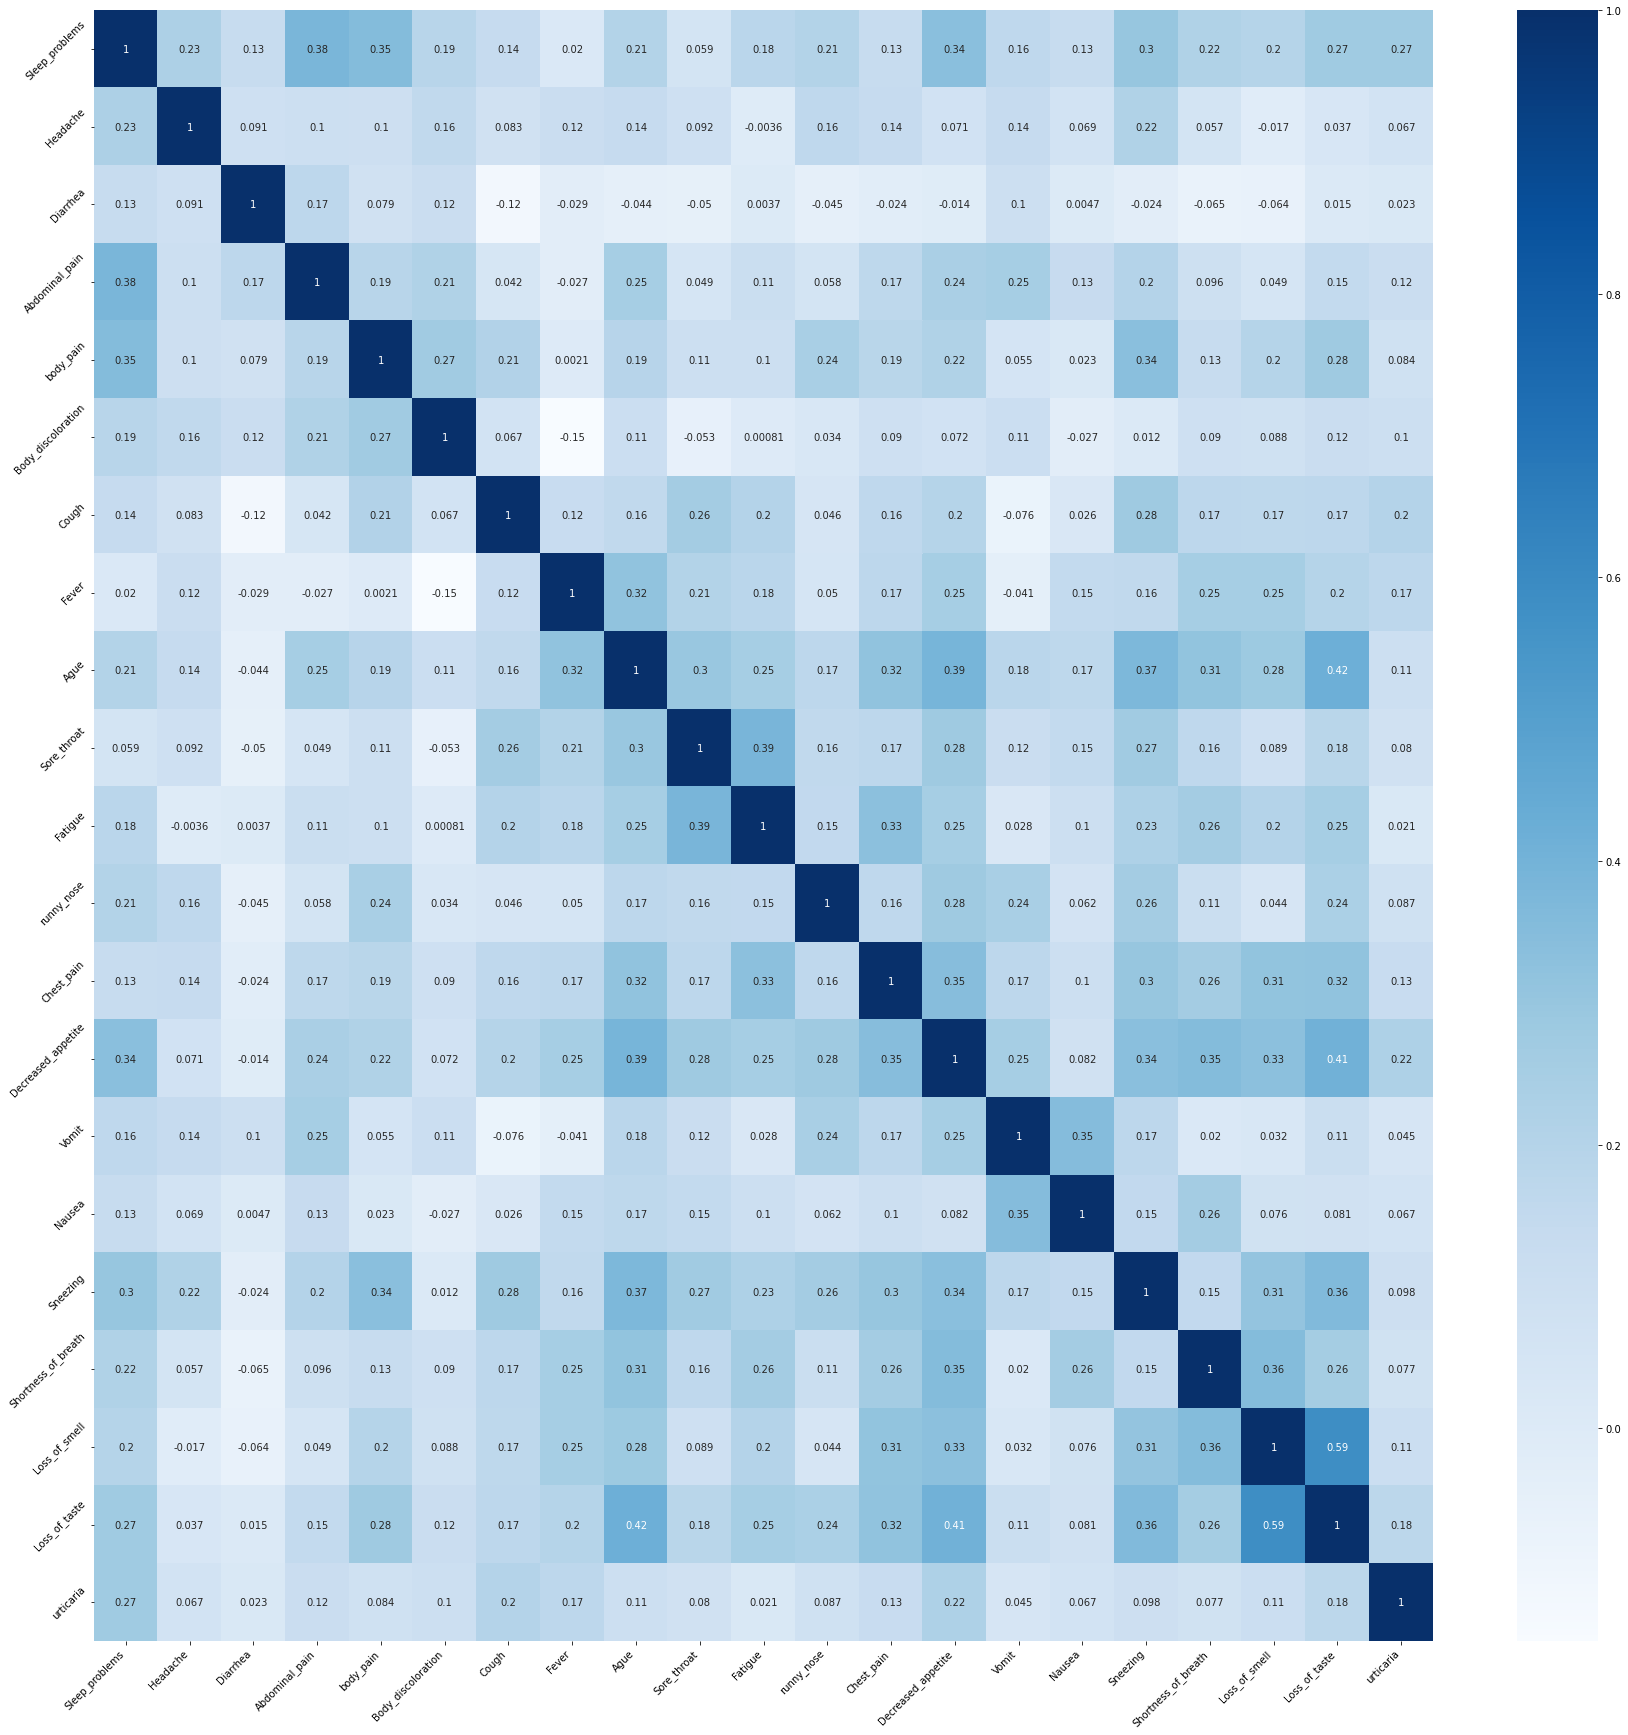

In [62]:
plt.figure(figsize=(30,30))
cor = covid.corr()
ax=sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
covid =covid.drop(['Loss_of_smell','Ague','Decreased_appetite' ,'Sore_throat','Abdominal_pain'],axis=1)


In [71]:
att={}
for i in covid.columns:
    att[i]=[1,0]

In [75]:
all=pd.DataFrame([row for row in product(*att.values())],columns=att.keys())



In [76]:
q=len(all)
w=len(covid)
print(q,w)

65536 205


In [97]:
new_all=all.sample(n=100)

In [98]:
no_class = pd.concat([covid,new_all])
no_covid=no_class.drop_duplicates(keep=False)
len(no_covid)

261

In [99]:
no_covid['class']=0
covid['class']=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
data =pd.concat([no_covid,covid],ignore_index=True)
data_alpha=data.replace({1:'yes', 0:'no'})

In [101]:
x=data.iloc[:,:-1]
y =data.iloc[:,-1]

In [102]:
data.to_excel("/content/data.xlsx",index=False)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10)

find_s

In [134]:
a=x.values.tolist()
b=y.values.tolist()

In [150]:
for i , val in enumerate(b):
  if val==1:
    s=a[i].copy()
    break
for i , val in enumerate(a):
  if b[i]==1:
    for u in range(len(s)):
      if str(val[u])!=s[u]:
        s[u]="?"
      else:
        pass
            


In [151]:
s

['?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?']

In [159]:
def learn(concepts, target):

    specific_h = concepts[0].copy()

    print("Initialization of specific_h and general_h")

    print("specific_h: ",specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("general_h: ",general_h)

    print("concepts: ",concepts)

    for i, h in enumerate(concepts):

        if target[i] == 1:

            for x in range(len(specific_h)):

                #print("h[x]",h[x])

                if str(h[x]) != specific_h[x]:

                    specific_h[x] = '?'

                    general_h[x][x] = '?'

        if target[i] == 0:

            for x in range(len(specific_h)):

                if str(h[x]) != specific_h[x]:

                    general_h[x][x] = specific_h[x]

                else:

                    general_h[x][x] = '?'

    print("\nSteps of Candidate Elimination Algorithm: ",i+1)

    print("Specific_h: ",i+1)

    print(specific_h,"\n")

    print("general_h :", i+1)

    print(general_h)

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?','?', '?', '?', '?', '?', '?','?', '?', '?', '?']]

    print("\nIndices",indices)

    for i in indices:

        general_h.remove(['?', '?', '?', '?', '?', '?','?', '?', '?', '?', '?', '?','?', '?', '?', '?'])
    if(len(general_h))==0:
      general_h=['?', '?', '?', '?', '?', '?','?', '?', '?', '?', '?', '?','?', '?', '?', '?']
    return specific_h, general_h

s_final,g_final = learn(a, b)

print("\nFinal Specific_h:", s_final, sep="\n")

print("Final General_h:", g_final, sep="\n")

Initialization of specific_h and general_h
specific_h:  [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
general_h:  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '

#NB

In [169]:
a=x_train.values.tolist()
b=y_train.values.tolist()
c=x_test.values.tolist()
d=y_test.values.tolist()

In [173]:
nb = GaussianNB()
y_pred = nb.fit(x_train, y_train).predict(x_test)
score=nb.score(x_test, y_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))
print(score)

Number of mislabeled points out of a total 47 points : 14
0.7021276595744681


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,8))
plt.plot(range(1,50),error_rate,color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 

predicted = knn.predict(x_test)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(y_test)

Predictions from the classifier:
[0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1]
Target values:
101    0
183    0
168    0
333    1
360    1
61     0
33     0
186    0
67     0
151    0
93     0
389    1
179    0
426    1
60     0
331    1
164    0
234    0
449    1
103    0
438    1
359    1
454    1
162    0
345    1
407    1
387    1
112    0
446    1
441    1
355    1
406    1
330    1
298    1
197    0
213    0
310    1
97     0
350    1
117    0
231    0
96     0
191    0
277    1
380    1
176    0
45     0
Name: class, dtype: int64


In [178]:
print(accuracy_score(predicted, y_test))

0.5319148936170213


id3

In [183]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
clf.score(x_test, y_test)

0.3404255319148936

dt random

In [184]:
clf = DecisionTreeClassifier(random_state=0,splitter='random')
clf.fit(x_train, y_train)
y_pred=clf.predict(X_test)
clf.score(x_test, y_test)

0.3617021276595745

kmeans

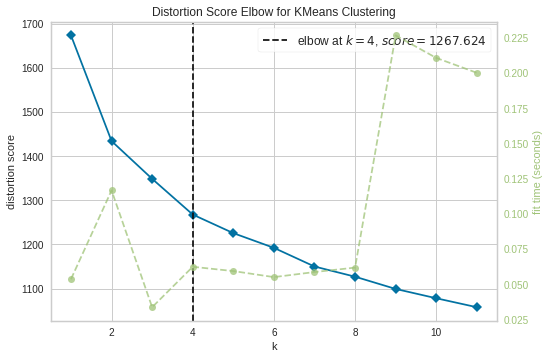

In [188]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data)
visualizer.show()

In [189]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data)

In [195]:
#inertia_float
#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
kmeans.labels_
print(accuracy_score(y,kmeans.labels_))


0.2553648068669528
